Saving cat.jpg to cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


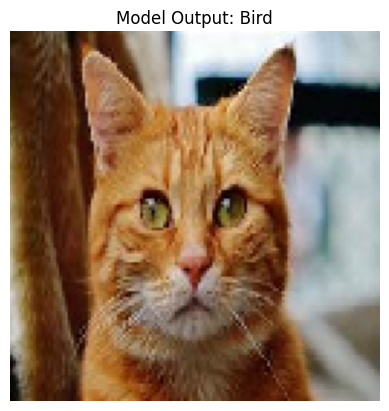

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

classes = ['Cat', 'Dog', 'Bird']
predicted_label = classes[class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f"Model Output: {predicted_label}")
plt.show()

In [6]:
# ===============================
# 1️⃣ Import Libraries
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files

# ===============================
# 2️⃣ Dataset Structure Required
# ===============================
# /content/dataset/train/cats
# /content/dataset/train/dogs
# /content/dataset/train/birds

# ===============================
# 3️⃣ Load Dataset
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

# ===============================
# 4️⃣ Build CNN Model
# ===============================
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===============================
# 5️⃣ Train Model
# ===============================
model.fit(train_generator, epochs=10)

# ===============================
# 6️⃣ Upload Image for Prediction
# ===============================
print("Upload Cat / Dog / Bird Image")
uploaded = files.upload()

img_path = list(uploaded.keys())[0]

# ===============================
# 7️⃣ Preprocess Image
# ===============================
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ===============================
# 8️⃣ Predict
# ===============================
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

classes = ['Cat','Dog','Bird']
predicted_label = classes[class_index]

# ===============================
# 9️⃣ Show Result
# ===============================
plt.imshow(img)
plt.axis('off')
plt.title(f"Model Output: {predicted_label}")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/train'

Upload your dataset zip or images


Saving Bird.jpg to Bird (1).jpg
Saving Dog.jpg to Dog (1).jpg
Saving cat.jpg to cat (1).jpg
Model Created Successfully!
Upload an image for prediction


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Saving cat2.jpg to cat2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


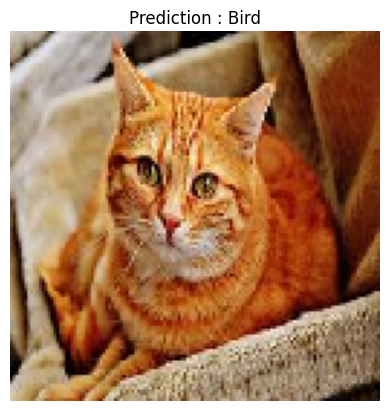

In [7]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files

# -----------------------------
# 2. Upload Dataset Folder
# -----------------------------
print("Upload your dataset zip or images")
uploaded_data = files.upload()

# Check dataset structure
dataset_path = "/content/dataset"
for path, folders, filenames in os.walk(dataset_path):
    print("Folder:", path, " -> Files:", filenames)

# -----------------------------
# 3. Build CNN Model
# -----------------------------
cnn_model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model Created Successfully!")

# -----------------------------
# 4. Upload Test Image
# -----------------------------
print("Upload an image for prediction")
test_file = files.upload()
test_image_path = list(test_file.keys())[0]

# -----------------------------
# 5. Image Preprocessing
# -----------------------------
input_img = load_img(test_image_path, target_size=(128,128))
input_array = img_to_array(input_img) / 255.0
input_array = np.expand_dims(input_array, axis=0)

# -----------------------------
# 6. Predict Output
# -----------------------------
pred = cnn_model.predict(input_array)
label_names = ["Cat", "Dog", "Bird"]

result_index = np.argmax(pred)
result_label = label_names[result_index]

# -----------------------------
# 7. Display Result
# -----------------------------
plt.imshow(input_img)
plt.title("Prediction : " + result_label)
plt.axis("off")
plt.show()
